<a href="https://colab.research.google.com/github/RaymondLeong94/Omdena-Project-2/blob/main/Goe_data_released_on_220623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GOE data -Real, released on 220623

# Cleaning:
- replace series values of none and none? with title
- replace category values with appropriate tags

Load Data

In [1]:
#mount drive and load file
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [3]:
#import csv
import csv
import pandas as pd

raw_df = pd.read_csv('/content/gdrive/MyDrive/GoE/GOE Content  - Real.csv')

fx's to use

In [4]:
#create class

import pandas as pd
import matplotlib.pyplot as plt
class DataFrameModifier:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def modify_column(self, column_name, modification_func):
        self.dataframe[column_name] = self.dataframe[column_name].apply(modification_func)
        return self.dataframe

    def check_nan_values(self):
        nan_columns = self.dataframe.columns[self.dataframe.isna().any()].tolist()
        nan_counts = self.dataframe.isna().sum().to_dict()
        return nan_columns, nan_counts

    def generate_unique_value_graphs(self):
        for column_name in self.dataframe.columns:
            unique_values = self.dataframe[column_name].unique()
            if len(unique_values) <= 20:
                plt.figure()
                self.dataframe[column_name].value_counts().plot(kind='bar')
                plt.xlabel(column_name)
                plt.ylabel('Count')
                plt.title('Unique Values for ' + column_name)
                plt.show()



In [5]:
modifier = DataFrameModifier(raw_df)
nan_columns, nan_counts = modifier.check_nan_values()
print(nan_columns)
print(nan_counts)

['Categories', 'Duration', 'Difficulty', 'Unnamed: 9']
{'Title': 0, 'Pillar': 0, 'Intructor': 0, 'Series': 0, 'Categories': 23, 'Tags': 0, 'Type': 0, 'Duration': 3, 'Difficulty': 20, 'Unnamed: 9': 256}


In [6]:
#drop the last column
raw_df = raw_df.drop(columns = 'Unnamed: 9')

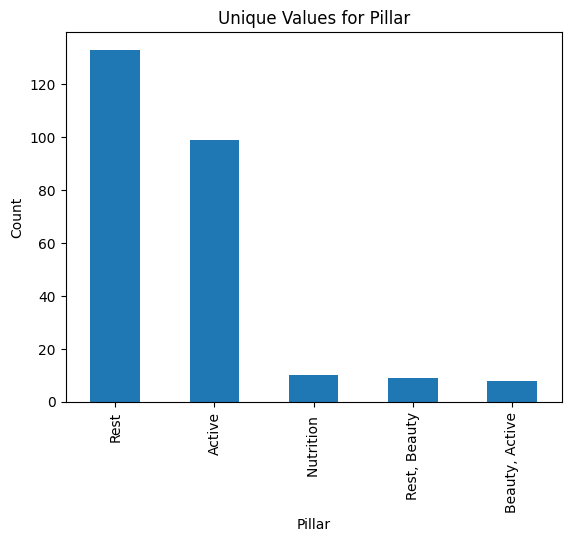

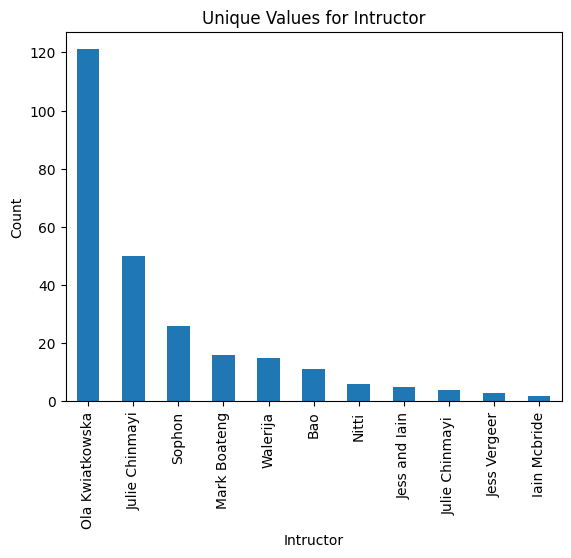

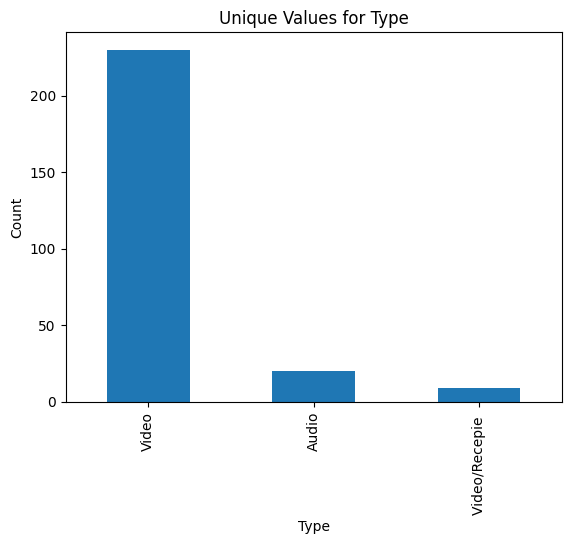

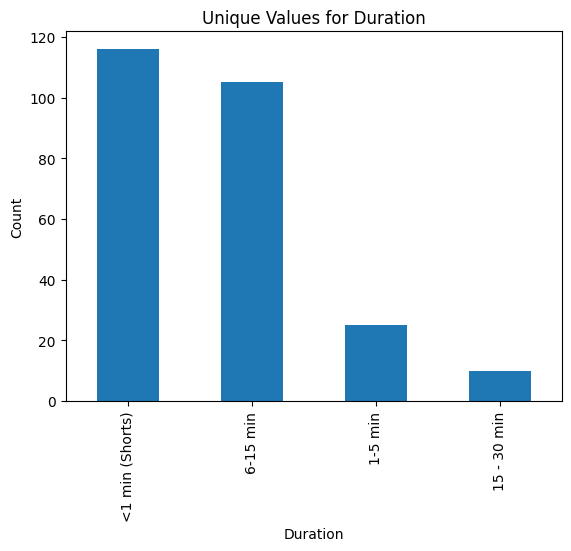

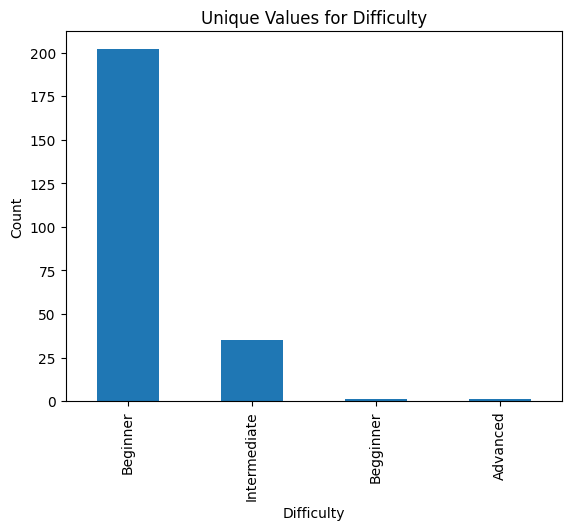

In [7]:
modifier = DataFrameModifier(raw_df)
modifier.generate_unique_value_graphs()

In [8]:
#explore the columns of categories, duration, difficulty where they are mia w/r/t title
raw_df[['Title', 'Categories', 'Duration', 'Difficulty']]

,Title,Categories,Duration,Difficulty
0,Box breathing,Breathing Exercises and Techniques,6-15 min,Begginner
1,7 count breath,Breathing Exercises and Techniques,1-5 min,Beginner
2,4-7-8 breathing,Breathing Exercises and Techniques,<1 min (Shorts),Beginner
3,Combo breathing,Breathing Exercises and Techniques,6-15 min,Beginner
4,Benefits of breathing practices\,Breathing Exercises and Techniques,1-5 min,Beginner
...,...,...,...,...
254,Thai Stretching Class 2 8-13,NaN,15 - 30 min,Intermediate
255,Thai Stretching Class 3 14-19,NaN,15 - 30 min,Intermediate
256,18 Thai Stretching Poses Library,NaN,1-5 min,Beginner
257,Walking Meditation,NaN,1-5 min,Intermediate


In [9]:
#fix spelling
raw_df['Difficulty'] = raw_df['Difficulty'].apply(lambda x: "Beginner" if x == 'Begginner' else x)

Start fixing series column with none and none? w/ regex

In [10]:
#we see the need to find the none and possibly replace it with someting else?
raw_df['Series'].value_counts()

Yoga Poses Library                                                                                                                                                                    34
Bodyweight Exercises Library                                                                                                                                                          31
Core Exercises Library                                                                                                                                                                29
none                                                                                                                                                                                  28
Thai Stretching Library                                                                                                                                                               20
Yoga                                                                       

In [11]:
#create dataframe for all series = none
#before change
pattern = r'.*none.*'
raw_df_series_none = raw_df[raw_df['Series'].str.contains(pattern, case = False, regex = True)]

In [12]:
#helper function needed later on but this will suffice for dropping subsets of df
raw_df= raw_df.drop(raw_df_series_none.index)

In [13]:
#after change
#set fx
import re
''''change str
we use isinstance if x is part of a string
we use sub with matching digits of an empty str of one or more digits
if x is not a stirng (number of nan return x)
'''


change_string =  lambda x: re.sub(r'\d+', '', x) if isinstance(x, str) else x


def modify_column_with_number(dataframe, column_with_number, column_without_number):
    dataframe[column_without_number] = dataframe[column_with_number].apply(change_string)
    return dataframe



# replace series= none?/none with title stripped of numbers
raw_df_series_none = modify_column_with_number(raw_df_series_none, 'Title', 'Series')

raw_df_series_none


<ipython-input-13-87d52753c5e9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column_without_number] = dataframe[column_with_number].apply(change_string)


,Title,Pillar,Intructor,Series,Categories,Tags,Type,Duration,Difficulty
0,Box breathing,Rest,Ola Kwiatkowska,Box breathing,Breathing Exercises and Techniques,"Relaxation, Stress Relief, Deep Breathing",Audio,6-15 min,Beginner
1,7 count breath,Rest,Ola Kwiatkowska,count breath,Breathing Exercises and Techniques,"Deep Breathing, Guided Relaxation, Restful Sleep",Audio,1-5 min,Beginner
2,4-7-8 breathing,Rest,Ola Kwiatkowska,-- breathing,Breathing Exercises and Techniques,"Stress Relief, Restful Sleep, Stress Management",Audio,<1 min (Shorts),Beginner
3,Combo breathing,Rest,Ola Kwiatkowska,Combo breathing,Breathing Exercises and Techniques,"Stress Management, Breathing, Relaxation",Audio,6-15 min,Beginner
4,Benefits of breathing practices\,Rest,Ola Kwiatkowska,Benefits of breathing practices\,Breathing Exercises and Techniques,"Educational, Breathing, Restfull Sleep, Stress...",Audio,1-5 min,Beginner
5,Body scanning meditation,"Rest, Beauty",Ola Kwiatkowska,Body scanning meditation,Meditation and Mindfulness,"Guided Meditation, Mindfullness, Stress Manage...",Audio,1-5 min,Beginner
6,Breath work meditation,"Rest, Beauty",Ola Kwiatkowska,Breath work meditation,Meditation and Mindfulness,"Guided Meditaion, Mindfullness, Relaxation, Br...",Audio,1-5 min,Beginner
7,Gratitude meditation,"Rest, Beauty",Ola Kwiatkowska,Gratitude meditation,Meditation and Mindfulness,"Guided Meditaion, Mindfullness, Positive Affir...",Audio,1-5 min,Beginner
8,Mindfulness meditation,"Rest, Beauty",Ola Kwiatkowska,Mindfulness meditation,Meditation and Mindfulness,"Guided Meditaion, Mindfullness, Mind-Body Conn...",Audio,1-5 min,Beginner
9,Loving-kindness meditation,"Rest, Beauty",Ola Kwiatkowska,Loving-kindness meditation,Meditation and Mindfulness,"Guided Meditation, Mindfullness, Emotional Wel...",Audio,1-5 min,Beginner


In [14]:
#looking at raw_df's series
#it would be safe to assume that these can be either a start of a new series or can be grouped together
#more cleaning is needed later on
raw_df_series_none.Series

0                                          Box breathing
1                                           count breath
2                                           -- breathing
3                                        Combo breathing
4                       Benefits of breathing practices\
5                               Body scanning meditation
6                                 Breath work meditation
7                                   Gratitude meditation
8                                 Mindfulness meditation
9                             Loving-kindness meditation
10                                     Chakra meditation
11                                     Nature meditation
12                                    What is meditation
13                                Benefits of meditation
14                              Apple & cinnamon crumble
15                         Breaking down a Balanced diet
16                         Chocolate mousse & chia seeds
17                             

In [15]:
#concat with axis = 0 for vertical stack based off of index values
raw_df = pd.concat([raw_df, raw_df_series_none], axis = 0)

In [16]:
#no more none values in series column for original raw_df
raw_df['Series'].value_counts()

Yoga Poses Library                                                                                                                                                                    34
Bodyweight Exercises Library                                                                                                                                                          31
Core Exercises Library                                                                                                                                                                29
Thai Stretching Library                                                                                                                                                               20
Yoga                                                                                                                                                                                  16
Pranayama                                                                  

Shift focus to categories

In [17]:
print(nan_columns)
print(nan_counts)
raw_df.Categories.isna().sum()

['Categories', 'Duration', 'Difficulty', 'Unnamed: 9']
{'Title': 0, 'Pillar': 0, 'Intructor': 0, 'Series': 0, 'Categories': 23, 'Tags': 0, 'Type': 0, 'Duration': 3, 'Difficulty': 20, 'Unnamed: 9': 256}


23

In [18]:
raw_df_categories_nan= raw_df[raw_df['Categories'].isna()]

In [19]:
raw_df.Categories.value_counts()

Get to know the technique                             95
Yoga and Stretching for Relaxation                    20
Dance and Aerobics                                    15
Take abreath, Mind and Body                           13
Take a breath, Mind and Body                          10
Meditation and Mindfulness                             9
Mind and body                                          8
Meditation, Mind and body                              6
Breathing Exercises and Techniques                     5
Relax, Mind and Body                                   3
Pulse raiser                                           3
GOE Academy                                            3
Just your body,On the floor, Sweet and short           3
Push yourself, Just your body, Get energised           3
Fitness Mojo, Pulse raiser                             3
Stretching, Yoga                                       3
Dinner                                                 2
My evening routine, Relax, Chec

In [20]:
raw_df['Title_duplicate'] = raw_df['Title']
raw_df

,Title,Pillar,Intructor,Series,Categories,Tags,Type,Duration,Difficulty,Title_duplicate
24,15 min Bodyweight Beginners Workout,Active,Ola Kwiatkowska,Bodyweight series,"Get started, Just your body, Fitness Mojo",x,Video,6-15 min,Intermediate,15 min Bodyweight Beginners Workout
25,20 min Bodyweight Beginners Workout,Active,Ola Kwiatkowska,Bodyweight series,"Just your body, Fitness Mojo","bodyweight, strength, whole body",Video,15 - 30 min,Intermediate,20 min Bodyweight Beginners Workout
26,Bodyweight Workout Advantages & Benefits,Active,Ola Kwiatkowska,Bodyweight series,Check why,"bodyweight, strength, whole body",Video,NaN,NaN,Bodyweight Workout Advantages & Benefits
27,What it is and how to use Bodyweight Exercises...,Active,Ola Kwiatkowska,Bodyweight Exercises Library,Get to know the technique,"Body weight, library",Video,<1 min (Shorts),Beginner,What it is and how to use Bodyweight Exercises...
28,Basic Squat - Bodyweight Library,Active,Ola Kwiatkowska,Bodyweight Exercises Library,Get to know the technique,"Body weight, library",Video,<1 min (Shorts),Beginner,Basic Squat - Bodyweight Library
...,...,...,...,...,...,...,...,...,...,...
196,Whole body dumbbell workout - intermediate 1,Active,Mark Boateng,Whole body dumbbell workout - intermediate,Pulse raiser,"Strenght, Dumbell, whole body",Video,6-15 min,Intermediate,Whole body dumbbell workout - intermediate 1
197,Whole body dumbbell workout - intermediate 2,Active,Mark Boateng,Whole body dumbbell workout - intermediate,Pulse raiser,"Strenght, Dumbell, whole body",Video,6-15 min,Intermediate,Whole body dumbbell workout - intermediate 2
198,Whole body dumbbell workout - intermediate 3,Active,Mark Boateng,Whole body dumbbell workout - intermediate,Pulse raiser,"Strenght, Dumbell, whole body",Video,6-15 min,Intermediate,Whole body dumbbell workout - intermediate 3
199,Core workout 3,Active,Mark Boateng,Core workout,"Just your body,On the floor, Sweet and short","Core, strenght, body weight",Video,6-15 min,Beginner,Core workout 3


use nltk on duplicated title column

In [21]:
#from first notebook
#get NLTK out of the way
import nltk
nltk.download('punkt')#library of words
nltk.download('words')#another library of words
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
import nltk
from nltk import pos_tag#tags position
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet# need
from nltk.stem import WordNetLemmatizer #need
sw = stopwords.words('english')

#what other stop wards can be used to that is not representative
#sw.extend([''])#
#added all punctuation, made sure # and @ wasnt in there
punctuation = '!"$%&\'()*+,-./:;<=>?[\]^_`{|}~“!'
twitter_re = re.compile('[#@][a-zA-Z]*')
num_re = re.compile('^\d{1}$')
hashtags = re.compile ("#([a-zA-Z0-9_]{1,50})")

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def txt_clean(txt, stop_words=sw):
    # takes in a string and returns a cleaned up string ready for count or tfidf vectorizing

    # splitting the text up into words
    t = txt.split(' ')
    # turning the words lowercase
    t = [w.lower() for w in t]
    # removing punctuation
    t = [w.translate(w.maketrans('','', punctuation)) for w in t]
    # removing @'s and #'s which are twitter jargon
    t = [w for w in t if not twitter_re.match(w)]
    t = [w for w in t if not hashtags.match(w)]

    # removing leftover numbers
    t = [w for w in t if not num_re.match(w)]
    # removing stop words and more twitter jargon
    t = [w for w in t if w not in stop_words]
    # removing empty strings
    t = [w for w in t if w]

    # word lemmatizing
    t = pos_tag(t)
    t = [(w[0], get_wordnet_pos(w[1])) for w in t]
    lem = WordNetLemmatizer()
    t = [lem.lemmatize(w[0], w[1]) for w in t]
    # joining all the strings together into one
    return ' '.join(t)
raw_df['Title_duplicate']= raw_df['Title_duplicate'].map(txt_clean)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [22]:
raw_df

,Title,Pillar,Intructor,Series,Categories,Tags,Type,Duration,Difficulty,Title_duplicate
24,15 min Bodyweight Beginners Workout,Active,Ola Kwiatkowska,Bodyweight series,"Get started, Just your body, Fitness Mojo",x,Video,6-15 min,Intermediate,15 min bodyweight beginner workout
25,20 min Bodyweight Beginners Workout,Active,Ola Kwiatkowska,Bodyweight series,"Just your body, Fitness Mojo","bodyweight, strength, whole body",Video,15 - 30 min,Intermediate,20 min bodyweight beginner workout
26,Bodyweight Workout Advantages & Benefits,Active,Ola Kwiatkowska,Bodyweight series,Check why,"bodyweight, strength, whole body",Video,NaN,NaN,bodyweight workout advantage benefit
27,What it is and how to use Bodyweight Exercises...,Active,Ola Kwiatkowska,Bodyweight Exercises Library,Get to know the technique,"Body weight, library",Video,<1 min (Shorts),Beginner,use bodyweight exercise library
28,Basic Squat - Bodyweight Library,Active,Ola Kwiatkowska,Bodyweight Exercises Library,Get to know the technique,"Body weight, library",Video,<1 min (Shorts),Beginner,basic squat bodyweight library
...,...,...,...,...,...,...,...,...,...,...
196,Whole body dumbbell workout - intermediate 1,Active,Mark Boateng,Whole body dumbbell workout - intermediate,Pulse raiser,"Strenght, Dumbell, whole body",Video,6-15 min,Intermediate,whole body dumbbell workout intermediate
197,Whole body dumbbell workout - intermediate 2,Active,Mark Boateng,Whole body dumbbell workout - intermediate,Pulse raiser,"Strenght, Dumbell, whole body",Video,6-15 min,Intermediate,whole body dumbbell workout intermediate
198,Whole body dumbbell workout - intermediate 3,Active,Mark Boateng,Whole body dumbbell workout - intermediate,Pulse raiser,"Strenght, Dumbell, whole body",Video,6-15 min,Intermediate,whole body dumbbell workout intermediate
199,Core workout 3,Active,Mark Boateng,Core workout,"Just your body,On the floor, Sweet and short","Core, strenght, body weight",Video,6-15 min,Beginner,core workout


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Split the data into training and testing sets
train_df = raw_df.dropna(subset=['Categories'])
test_df = raw_df[raw_df['Categories'].isna()]

# Preprocess the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['Title_duplicate'])
train_sequences = tokenizer.texts_to_sequences(train_df['Title_duplicate'])
test_sequences = tokenizer.texts_to_sequences(test_df['Title_duplicate'])
vocab_size = len(tokenizer.word_index) + 1

max_len = 100
train_data = pad_sequences(train_sequences, maxlen=max_len)
test_data = pad_sequences(test_sequences, maxlen=max_len)

#label encoding for the category labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['Categories'])

# Determine the number of unique categories
num_categories = len(label_encoder.classes_)

# Encode the target labels as one-hot vectors
train_labels = to_categorical(train_labels, num_categories)

# Create the deep learning model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(num_categories, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Predict and fill NaN values
test_predictions = model.predict(test_data)
test_predictions = test_predictions.argmax(axis=1)
raw_df.loc[raw_df['Categories'].isna(), 'Categories'] = label_encoder.inverse_transform(test_predictions)




Epoch 1/10
6/6 [==============================] - 10s 632ms/step - loss: 3.7080 - accuracy: 0.4362 - val_loss: 3.8315 - val_accuracy: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 2s 344ms/step - loss: 2.6699 - accuracy: 0.5053 - val_loss: 5.0057 - val_accuracy: 0.0000e+00
Epoch 3/10
6/6 [==============================] - 1s 183ms/step - loss: 2.1901 - accuracy: 0.5053 - val_loss: 5.4006 - val_accuracy: 0.0000e+00
Epoch 4/10
6/6 [==============================] - 1s 182ms/step - loss: 2.0761 - accuracy: 0.5053 - val_loss: 5.7675 - val_accuracy: 0.0000e+00
Epoch 5/10
6/6 [==============================] - 1s 182ms/step - loss: 2.0456 - accuracy: 0.5053 - val_loss: 6.2696 - val_accuracy: 0.0000e+00
Epoch 6/10
6/6 [==============================] - 1s 188ms/step - loss: 2.0102 - accuracy: 0.5053 - val_loss: 6.4127 - val_accuracy: 0.0000e+00
Epoch 7/10
6/6 [==============================] - 1s 184ms/step - loss: 1.9593 - accuracy: 0.5053 - val_loss: 6.5508 - val_accuracy: 0.

In [24]:
raw_df.Categories.value_counts()

Get to know the technique                             118
Yoga and Stretching for Relaxation                     20
Dance and Aerobics                                     15
Take abreath, Mind and Body                            13
Take a breath, Mind and Body                           10
Meditation and Mindfulness                              9
Mind and body                                           8
Meditation, Mind and body                               6
Breathing Exercises and Techniques                      5
Relax, Mind and Body                                    3
Pulse raiser                                            3
GOE Academy                                             3
Just your body,On the floor, Sweet and short            3
Push yourself, Just your body, Get energised            3
Fitness Mojo, Pulse raiser                              3
Stretching, Yoga                                        3
Dinner                                                  2
My evening rou

In [25]:
#before
raw_df_categories_nan

,Title,Pillar,Intructor,Series,Categories,Tags,Type,Duration,Difficulty
216,Muay Thai Introduction,Active,Bao,Muay Thai,NaN,Muay Thai,Video,<1 min (Shorts),Beginner
217,Muay Thai Training For Beginners,Active,Bao,Muay Thai,NaN,Muay Thai,Video,6-15 min,Beginner
218,Muay Thai Trainings with people,Active,Bao,Muay Thai,NaN,Muay Thai,Video,6-15 min,Beginner
219,12 Muay Thai Poses,Active,Bao,Muay Thai,NaN,Muay Thai,Video,1-5 min,Beginner
220,Kettlebell stretching for Muay Thai,Active,Bao,Muay Thai,NaN,Muay Thai,Video,1-5 min,Beginner
221,Thai-Chi Introduction,Rest,Bao,Thai-Chi,NaN,Thai-Chi,Video,<1 min (Shorts),Beginner
222,Thai-Chi for Beginners 1,Rest,Bao,Thai-Chi,NaN,Thai-Chi,Video,6-15 min,Beginner
223,Thai-Chi for Beginners 2,Rest,Bao,Thai-Chi,NaN,Thai-Chi,Video,6-15 min,Beginner
224,Thai-Chi for Beginners 3,Rest,Bao,Thai-Chi,NaN,Thai-Chi,Video,6-15 min,Beginner
225,16 Thai-Chi Poses Library,Rest,Bao,Thai-Chi,NaN,Thai-Chi,Video,6-15 min,Beginner


In [26]:
#after
category_nan_index= raw_df_categories_nan.index.values
comparison = raw_df[raw_df.index.isin(category_nan_index)]
comparison

,Title,Pillar,Intructor,Series,Categories,Tags,Type,Duration,Difficulty,Title_duplicate
216,Muay Thai Introduction,Active,Bao,Muay Thai,Get to know the technique,Muay Thai,Video,<1 min (Shorts),Beginner,muay thai introduction
217,Muay Thai Training For Beginners,Active,Bao,Muay Thai,Get to know the technique,Muay Thai,Video,6-15 min,Beginner,muay thai training beginner
218,Muay Thai Trainings with people,Active,Bao,Muay Thai,Get to know the technique,Muay Thai,Video,6-15 min,Beginner,muay thai training people
219,12 Muay Thai Poses,Active,Bao,Muay Thai,Get to know the technique,Muay Thai,Video,1-5 min,Beginner,12 muay thai pose
220,Kettlebell stretching for Muay Thai,Active,Bao,Muay Thai,Get to know the technique,Muay Thai,Video,1-5 min,Beginner,kettlebell stretch muay thai
221,Thai-Chi Introduction,Rest,Bao,Thai-Chi,Get to know the technique,Thai-Chi,Video,<1 min (Shorts),Beginner,thaichi introduction
222,Thai-Chi for Beginners 1,Rest,Bao,Thai-Chi,Get to know the technique,Thai-Chi,Video,6-15 min,Beginner,thaichi beginner
223,Thai-Chi for Beginners 2,Rest,Bao,Thai-Chi,Get to know the technique,Thai-Chi,Video,6-15 min,Beginner,thaichi beginner
224,Thai-Chi for Beginners 3,Rest,Bao,Thai-Chi,Get to know the technique,Thai-Chi,Video,6-15 min,Beginner,thaichi beginner
225,16 Thai-Chi Poses Library,Rest,Bao,Thai-Chi,Get to know the technique,Thai-Chi,Video,6-15 min,Beginner,16 thaichi pose library


In [27]:
#drop and remake
#concat with axis = 0 for vertical stack based off of index values
raw_df= raw_df.drop(comparison.index)


In [28]:
raw_df = pd.concat([raw_df, comparison], axis = 0)

Unfortunately we need more tuning because all of the filled in NaN values were "Get to know the technique"


Moving onto difficulty nan values

In [29]:
raw_df_difficulty_nan= raw_df[raw_df['Difficulty'].isna()]
raw_df_difficulty_nan

,Title,Pillar,Intructor,Series,Categories,Tags,Type,Duration,Difficulty,Title_duplicate
26,Bodyweight Workout Advantages & Benefits,Active,Ola Kwiatkowska,Bodyweight series,Check why,"bodyweight, strength, whole body",Video,NaN,NaN,bodyweight workout advantage benefit
234,Pose 1,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
235,Pose 2,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
236,Pose 3,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
237,Pose 4,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
238,Pose 5,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
239,Pose 6,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
240,Pose 7,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
241,Pose 8,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
242,Pose 9,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose


In [30]:
#what is the relationship between series, categories and previous difficulty levels?
raw_df[raw_df['Series'] == "Thai Stretching Library"]

,Title,Pillar,Intructor,Series,Categories,Tags,Type,Duration,Difficulty,Title_duplicate
233,Intro to Thai Stretching Library,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),Beginner,intro thai stretch library
234,Pose 1,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
235,Pose 2,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
236,Pose 3,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
237,Pose 4,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
238,Pose 5,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
239,Pose 6,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
240,Pose 7,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
241,Pose 8,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
242,Pose 9,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose


In [31]:
#what about categories
raw_df[raw_df['Categories'] == "Yoga and Stretching for Relaxation"]

,Title,Pillar,Intructor,Series,Categories,Tags,Type,Duration,Difficulty,Title_duplicate
233,Intro to Thai Stretching Library,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),Beginner,intro thai stretch library
234,Pose 1,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
235,Pose 2,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
236,Pose 3,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
237,Pose 4,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
238,Pose 5,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
239,Pose 6,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
240,Pose 7,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
241,Pose 8,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
242,Pose 9,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose


In [32]:
#instructor?!
raw_df[raw_df['Intructor'] == "Sophon"]

,Title,Pillar,Intructor,Series,Categories,Tags,Type,Duration,Difficulty,Title_duplicate
233,Intro to Thai Stretching Library,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),Beginner,intro thai stretch library
234,Pose 1,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
235,Pose 2,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
236,Pose 3,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
237,Pose 4,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
238,Pose 5,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
239,Pose 6,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
240,Pose 7,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
241,Pose 8,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose
242,Pose 9,Rest,Sophon,Thai Stretching Library,Yoga and Stretching for Relaxation,"Thai Stretching, Stretching,",Video,<1 min (Shorts),NaN,pose


In [33]:
# we can replace this with beginner as the poses may be a part of index value 233: Title- Intro to Thai stretching library
raw_df['Difficulty'] =  raw_df['Difficulty'].fillna('Beginner')


In [35]:
raw_df.Difficulty.isna().sum()

0

In [36]:
#double check any missing values
modifier = DataFrameModifier(raw_df)
nan_columns, nan_counts = modifier.check_nan_values()
print(nan_columns)
print(nan_counts)

['Duration']
{'Title': 0, 'Pillar': 0, 'Intructor': 0, 'Series': 0, 'Categories': 0, 'Tags': 0, 'Type': 0, 'Duration': 3, 'Difficulty': 0, 'Title_duplicate': 0}
